In [12]:
#1. import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import time
from datetime import datetime
from scipy.stats import linregress
#import the requests library
import requests
#import the API key
from config import weather_api_key

In [2]:
#starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [28]:
#create an empty list to hold city data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [29]:
#create a set of 1500 random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs
#zip function saves the objects as a tuple acessed by 0 and 1 respectively

In [30]:
#add the latitudes and longitudes to a list
#you can only unzip a tuple once before it is removed from memory
coordinates = list(lats_lngs)
coordinates

[(21.090137107571294, -70.9535027818011),
 (-68.79951266754892, -11.211387365627587),
 (-2.8028565341409433, -83.49529293745532),
 (51.79414044654524, -14.148824021481204),
 (-2.5197136128399222, 91.90804023909499),
 (32.36991461328512, 136.21383293767656),
 (79.06673919116349, -40.163417740890054),
 (38.97184052121435, 104.87960918314377),
 (77.19525010429979, 147.53534769665083),
 (83.67650473656872, 19.660135387610154),
 (-38.804332372771924, 131.97795831944217),
 (45.77767731342223, 0.9471431009401101),
 (71.39444167253797, 104.50778899510357),
 (44.74818401908311, -44.93808954963299),
 (15.844880970062846, -139.73816813177442),
 (-14.280203711005228, 23.090804598626363),
 (27.250347079559575, 168.9631526123896),
 (-74.62194955095006, -8.86027519226252),
 (-13.916372201599017, -32.40877408765209),
 (19.233280746615932, 55.28585779319587),
 (4.035100467502829, -140.0306016947632),
 (-33.57425715482188, -87.76050840423862),
 (-20.134570427509857, -146.99378248344453),
 (-34.117769753

In [31]:
#create a list for holding cities
cities = []
#identify the nearest city for each latitude and longitude combination
#the citipy module finds cities with a population of 500 or more
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city name is unique, we will add it to the city list
    if city not in cities:
        cities.append(city)
#print the city list length to confirm the cities printed out
print(len(cities))

627


In [32]:
#2. loop through the cities list
#3. group the cities into groups of 50 to log the process
#4. build the city_url endpoint for each city
#5. log the url and record and set numbers
#6. Make an API request for each city
#7. Parse th JSON weather data for the following: city, country, date, lat, long, max temp, humidity, cloudiness, wind speed
#8. add the data to a list in a dictionary format, convert the list into a dataframe

In [33]:
#loop through all the cities in our list:
#for i in range(len(cities)):
#since we are using the index for the city and not the city name, we need to enumerate the items in the list
for i, city in enumerate(cities):
    #if the loop exceeds 50 entries, the loop will sleep for 60 seconds
    #the free API for weather only allows 60 calls per minute, so the sleep function is necessary so we don't exceed the call limit
    #if the remainder of the index is zero and the index is greater than fifty
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #create an endpoint url for each city
    #the replace function concats blank spaces in city names
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1
#run an API request for each city
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #convert the datetime to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #append the city information to the city_data list.
        city_data.append({"City": city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})
        
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#indicate that data loading is complete
print("-------------------------------")
print("Data Retreival Complete")
print("-------------------------------")


Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | salinas
Processing Record 4 of Set 1 | dingle
Processing Record 5 of Set 1 | meulaboh
Processing Record 6 of Set 1 | shingu
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | yinchuan
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | saint-junien
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | lukulu
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | piacabucu
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | tautira
Processing Record 23 of Set 1 | jamestown
Processing Record 24 of Set 1 | nikolskoye
Processing Record 25

Processing Record 40 of Set 4 | rapid valley
Processing Record 41 of Set 4 | valleyview
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | rakoshyno
Processing Record 44 of Set 4 | kimbe
Processing Record 45 of Set 4 | yunyang
Processing Record 46 of Set 4 | shimoda
Processing Record 47 of Set 4 | tonantins
Processing Record 48 of Set 4 | ketchikan
Processing Record 49 of Set 4 | novosergiyevka
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | amapa
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | chebsara
Processing Record 5 of Set 5 | stromness
Processing Record 6 of Set 5 | palmeirais
Processing Record 7 of Set 5 | havoysund
Processing Record 8 of Set 5 | vaitape
Processing Record 9 of Set 5 | pierre
Processing Record 10 of Set 5 | thunder bay
Processing Record 11 of Set 5 | vershino-darasunskiy
Processing Record 12 of Set 5 | zaysan
Processing Record 13 of Set 5 | mao
Proc

Processing Record 30 of Set 8 | mitu
Processing Record 31 of Set 8 | jatibonico
Processing Record 32 of Set 8 | kiruna
Processing Record 33 of Set 8 | zhigansk
Processing Record 34 of Set 8 | chernyshevskiy
Processing Record 35 of Set 8 | el alto
Processing Record 36 of Set 8 | homer
Processing Record 37 of Set 8 | simplicio mendes
Processing Record 38 of Set 8 | saleaula
City not found. Skipping...
Processing Record 39 of Set 8 | tual
Processing Record 40 of Set 8 | bull savanna
Processing Record 41 of Set 8 | nong phai
Processing Record 42 of Set 8 | gujranwala
Processing Record 43 of Set 8 | uvira
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | khasan
Processing Record 46 of Set 8 | hun
Processing Record 47 of Set 8 | waingapu
Processing Record 48 of Set 8 | boende
Processing Record 49 of Set 8 | honolulu
Processing Record 50 of Set 8 | ijero
Processing Record 1 of Set 9 | smidovich
Processing Record 2 of Set 9 | novikovo
Processing Record 3 of Set 9 | khuzdar
P

Processing Record 19 of Set 12 | mafinga
Processing Record 20 of Set 12 | kaspiyskiy
Processing Record 21 of Set 12 | agadez
Processing Record 22 of Set 12 | saint-francois
Processing Record 23 of Set 12 | grand baie
Processing Record 24 of Set 12 | altay
Processing Record 25 of Set 12 | klobuck
Processing Record 26 of Set 12 | fort nelson
Processing Record 27 of Set 12 | banepa
Processing Record 28 of Set 12 | malwan
City not found. Skipping...
Processing Record 29 of Set 12 | qui nhon
Processing Record 30 of Set 12 | rawah
Processing Record 31 of Set 12 | gilau
Processing Record 32 of Set 12 | bokspits
City not found. Skipping...
Processing Record 33 of Set 12 | olkhovka
Processing Record 34 of Set 12 | ferkessedougou
Processing Record 35 of Set 12 | romanovskaya
Processing Record 36 of Set 12 | paradwip
City not found. Skipping...
Processing Record 37 of Set 12 | bonfim
Processing Record 38 of Set 12 | lapy
Processing Record 39 of Set 12 | angoche
Processing Record 40 of Set 12 | le

In [34]:
len(city_data)

578

In [35]:
#convert the array of dictionaries into a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.4612,-71.1419,77.58,73,0,13.04,TC,2022-01-27 03:03:33
1,Cape Town,-33.9258,18.4232,66.34,79,0,1.01,ZA,2022-01-27 03:02:14
2,Salinas,36.6777,-121.6555,57.97,75,0,1.25,US,2022-01-27 02:59:57
3,Dingle,10.9995,122.6711,84.65,73,97,10.25,PH,2022-01-27 03:03:34
4,Meulaboh,4.1363,96.1285,82.49,69,33,1.74,ID,2022-01-27 03:02:55
5,Shingu,33.7333,135.9833,52.68,43,100,0.56,JP,2022-01-27 03:03:35
6,Tasiilaq,65.6145,-37.6368,19.56,81,100,5.79,GL,2022-01-27 03:03:36
7,Yinchuan,38.4681,106.2731,25.59,38,74,4.81,CN,2022-01-27 03:03:36
8,Chokurdakh,70.6333,147.9167,-27.20,95,36,12.88,RU,2022-01-27 03:03:37
9,Longyearbyen,78.2186,15.6401,8.44,66,75,2.30,SJ,2022-01-27 03:03:38


In [36]:
#new_column_order
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [38]:
#create an output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data to a csv
city_data_df.to_csv(output_data_file, index_label="City ID")

In [3]:
#read cities.csv
weather_data_to_load = "weather_data/cities.csv"
#convert data frame
city_data_df = pd.read_csv(weather_data_to_load)

city_data_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Cockburn Town,TC,2022-01-27 03:03:33,21.4612,-71.1419,77.58,73,0,13.04
1,1,Cape Town,ZA,2022-01-27 03:02:14,-33.9258,18.4232,66.34,79,0,1.01
2,2,Salinas,US,2022-01-27 02:59:57,36.6777,-121.6555,57.97,75,0,1.25
3,3,Dingle,PH,2022-01-27 03:03:34,10.9995,122.6711,84.65,73,97,10.25
4,4,Meulaboh,ID,2022-01-27 03:02:55,4.1363,96.1285,82.49,69,33,1.74


In [4]:
#extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [5]:
#get today's date in seconds
today = time.time()
today

1643337860.861063

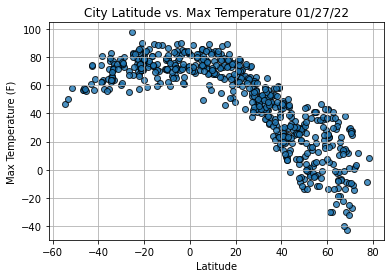

In [6]:
#build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#plot the figure
plt.show()

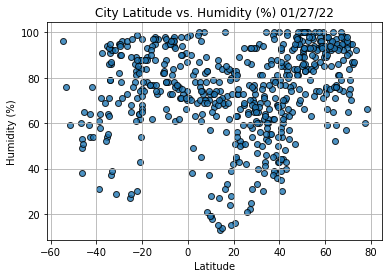

In [8]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#plot the figure
plt.show()

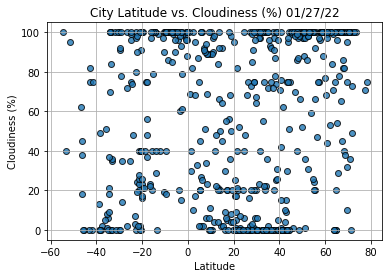

In [9]:
#build the scatterplot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#plot the figure
plt.show()

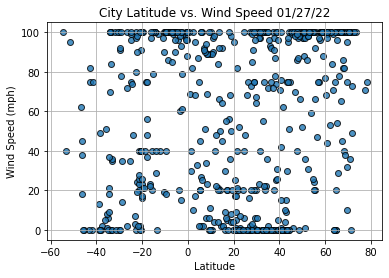

In [10]:
#build the scatterplot for wind speed
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#plot the figure
plt.show()

In [70]:
#create a function to perform linear regression on weather data
#and plot a gression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line y values from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n" + "rsq = " + str(round(r_value,3))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [71]:
#create hemisphere dataframes
#use the loc function
#index13 = city_data_df.loc[13]
#index13

In [72]:
#use the loc function with conditionals
#create northern and souther hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Cockburn Town,TC,2022-01-27 03:03:33,21.4612,-71.1419,77.58,73,0,13.04
2,2,Salinas,US,2022-01-27 02:59:57,36.6777,-121.6555,57.97,75,0,1.25
3,3,Dingle,PH,2022-01-27 03:03:34,10.9995,122.6711,84.65,73,97,10.25
4,4,Meulaboh,ID,2022-01-27 03:02:55,4.1363,96.1285,82.49,69,33,1.74
5,5,Shingu,JP,2022-01-27 03:03:35,33.7333,135.9833,52.68,43,100,0.56


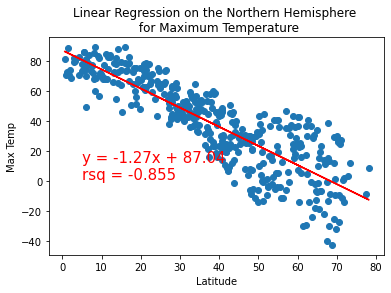

-0.8549081135895727


In [79]:
#linear regression on the Northern Hemisphere temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature","Max Temp", (5, 1))

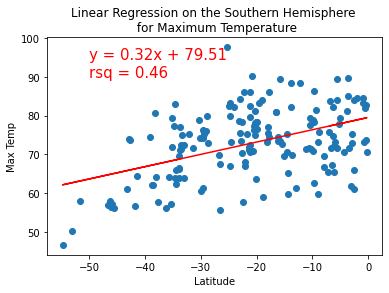

0.45978467375755805


In [80]:
#linear regression for the southern hemisphere temps
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                      "Max Temp", (-50,90))

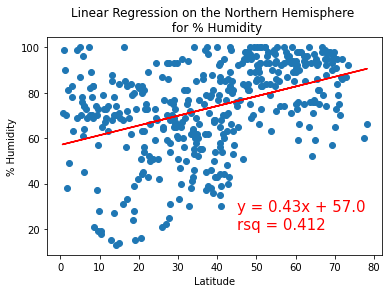

0.4119383766253041


In [81]:
#linear regression for the northrn hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity",
                      "% Humidity", (45,20))

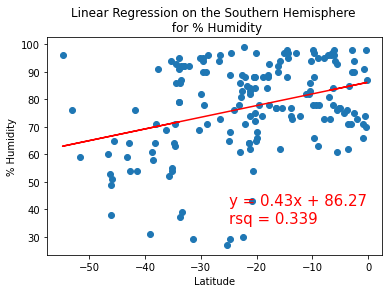

0.33926333160289446


In [82]:
#linear regression for the northrn hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity",
                      "% Humidity", (-25,35))

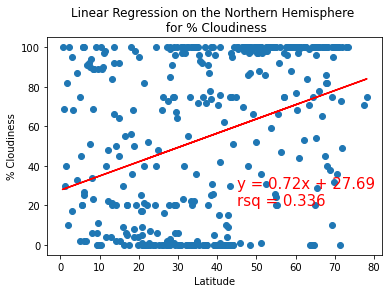

0.33624660898289066


In [83]:
#linear regression for the northrn hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                      "% Cloudiness", (45,20))

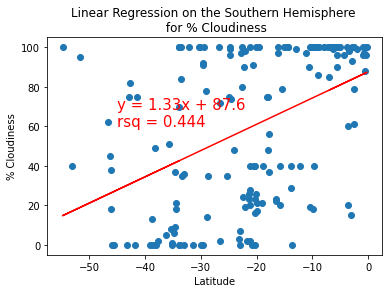

0.4436060493537787


In [84]:
#linear regression for the southern hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                      "% Cloudiness", (-45,60))

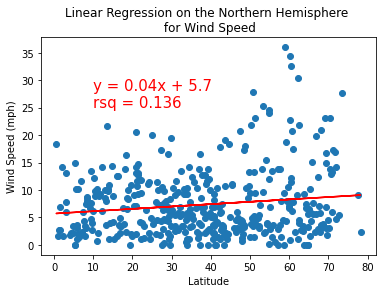

0.1361772606267995


In [87]:
#linear regression for the northrn hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                      "Wind Speed (mph)", (10,25))

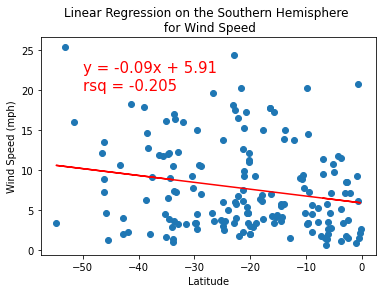

-0.20547393912693304


In [89]:
#linear regression for the northrn hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                      "Wind Speed (mph)", (-50,20))